Name: Aditya Singh

Design and implemention of Convolutional Neural Network on CIFAR10 Small Image Classification Dataset. Also perform this 
classification using transfer learning

In [1]:
from keras.datasets import cifar10
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
import numpy as np
from keras.models import Sequential
import tensorflow as tf
from keras.layers.convolutional import Conv2D,MaxPooling2D

In [6]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

In [3]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
print(X_train.shape)

(50000, 32, 32, 3)


In [4]:
print(y_train.shape)

(50000, 1)


In [9]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

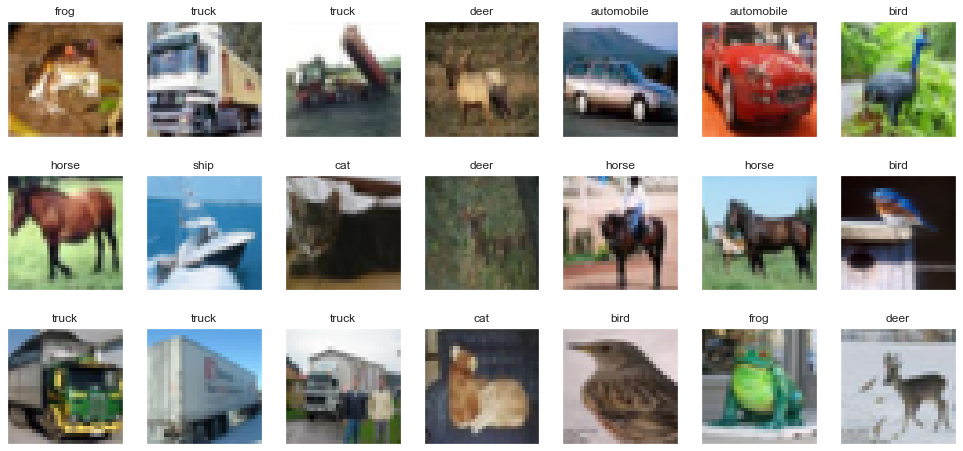

In [10]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [11]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

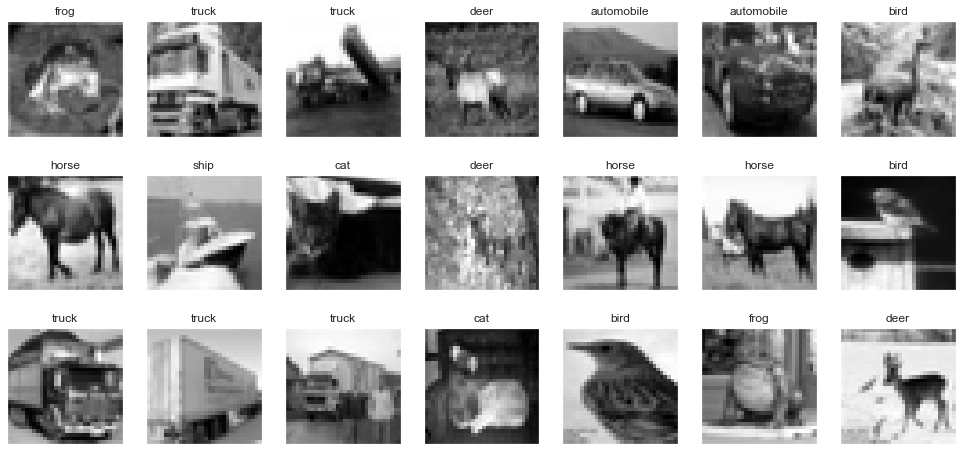

In [12]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [13]:
X_train  = X_train/255
X_test  = X_test/255

In [14]:
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(y_train)
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [16]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [17]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [19]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 16)        9232      
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        4640      
                                                      

In [21]:
model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [23]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/25
1563/1563 [==============================] - 184s 118ms/step - loss: 1.6938 - acc: 0.3722 - val_loss: 1.3291 - val_acc: 0.5126
Epoch 2/25
1563/1563 [==============================] - 171s 110ms/step - loss: 1.2941 - acc: 0.5388 - val_loss: 1.0750 - val_acc: 0.6253
Epoch 3/25
1563/1563 [==============================] - 171s 109ms/step - loss: 1.0929 - acc: 0.6181 - val_loss: 0.9942 - val_acc: 0.6588
Epoch 4/25
1563/1563 [==============================] - 162s 104ms/step - loss: 0.9775 - acc: 0.6622 - val_loss: 0.9072 - val_acc: 0.6889
Epoch 5/25
1563/1563 [==============================] - 168s 107ms/step - loss: 0.8857 - acc: 0.6962 - val_loss: 0.8899 - val_acc: 0.6983
Epoch 6/25
1563/1563 [==============================] - 166s 106ms/step - loss: 0.8194 - acc: 0.7197 - val_loss: 0.8450 - val_acc: 0.7172
Epoch 7/25
1563/1563 [==============================] - 162s 104ms/step - loss: 0.7668 - acc: 0.7383 - val_loss: 0.8694 - val_acc: 0.7075
Epoch 8/25
1563/1563 [============

In [24]:
model.save('CNN_CIFAR.h5')
model = load_model('CNN_CIFAR.h5')

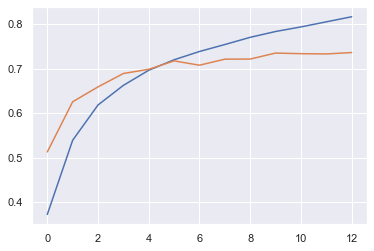

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

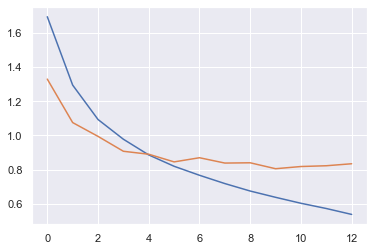

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [30]:
predictions = model.predict(X_test)
predictions = one_hot_encoder.inverse_transform(predictions)
y_test = one_hot_encoder.inverse_transform(y_test)
cm = confusion_matrix(y_test, predictions)

313/313 [==============================] - 7s 21ms/step


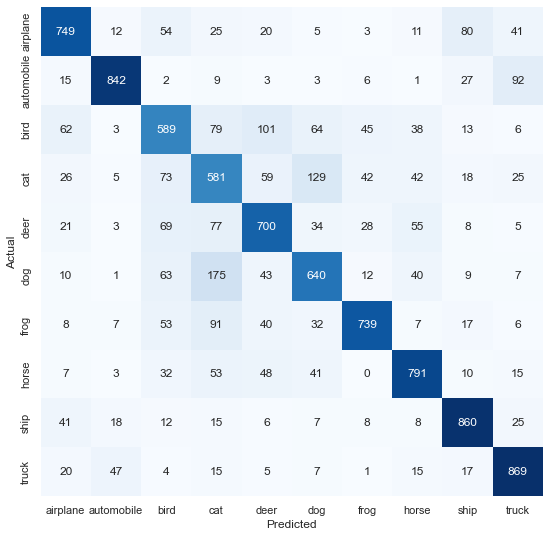

In [33]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

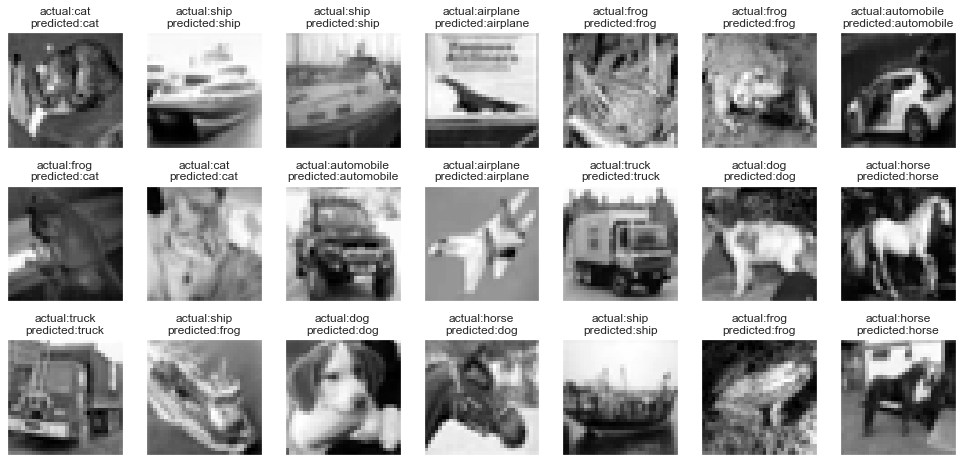

In [34]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])
y_test = y_test.astype(int)
predictions = predictions.astype(int)
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index][0]] + '\n' 
                            + 'predicted:' + labels[predictions[index][0]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()